#### Exploratory Data Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn2


##### General overview

In [3]:
train_df = pd.read_csv("../data/original_data/ais_train.csv", sep="|")

train_df.head()

,time,cog,sog,rot,heading,navstat,etaRaw,latitude,longitude,vesselId,portId
0,2024-01-01 00:00:25,284.0,0.7,0,88,0,01-09 23:00,-34.74370,-57.85130,61e9f3a8b937134a3c4bfdf7,61d371c43aeaecc07011a37f
1,2024-01-01 00:00:36,109.6,0.0,-6,347,1,12-29 20:00,8.89440,-79.47939,61e9f3d4b937134a3c4bff1f,634c4de270937fc01c3a7689
2,2024-01-01 00:01:45,111.0,11.0,0,112,0,01-02 09:00,39.19065,-76.47567,61e9f436b937134a3c4c0131,61d3847bb7b7526e1adf3d19
3,2024-01-01 00:03:11,96.4,0.0,0,142,1,12-31 20:00,-34.41189,151.02067,61e9f3b4b937134a3c4bfe77,61d36f770a1807568ff9a126
4,2024-01-01 00:03:51,214.0,19.7,0,215,0,01-25 12:00,35.88379,-5.91636,61e9f41bb937134a3c4c0087,634c4de270937fc01c3a74f3


In [4]:
train_df.dtypes

time          object
cog          float64
sog          float64
rot            int64
heading        int64
navstat        int64
etaRaw        object
latitude     float64
longitude    float64
vesselId      object
portId        object
dtype: object

In [5]:
train_df.describe()

,cog,sog,rot,heading,navstat,latitude,longitude
count,1.522065e+06,1.522065e+06,1.522065e+06,1.522065e+06,1.522065e+06,1.522065e+06,1.522065e+06
mean,1.782494e+02,6.331703e+00,5.054561e-01,1.762737e+02,2.092604e+00,3.658497e+01,1.153646e+01
std,1.076785e+02,7.539364e+00,1.760916e+01,1.070860e+02,2.411965e+00,2.290488e+01,6.871572e+01
min,0.000000e+00,0.000000e+00,-1.270000e+02,0.000000e+00,0.000000e+00,-4.753287e+01,-1.675409e+02
25%,7.820000e+01,0.000000e+00,0.000000e+00,7.500000e+01,0.000000e+00,3.451683e+01,-5.212810e+00
50%,1.838000e+02,5.000000e-01,0.000000e+00,1.800000e+02,0.000000e+00,4.223370e+01,4.234350e+00
75%,2.690000e+02,1.410000e+01,0.000000e+00,2.650000e+02,5.000000e+00,5.135197e+01,1.883715e+01
max,3.600000e+02,1.023000e+02,1.280000e+02,5.110000e+02,1.500000e+01,7.055720e+01,1.788054e+02


In [6]:
train_df.describe(include="object")

,time,etaRaw,vesselId,portId
count,1522065,1522065,1522065,1520450
unique,947226,9874,688,772
top,2024-04-25 03:59:44,02-04 15:00,6323f2287abc89c0a9631e57,61d36f9a0a1807568ff9a156
freq,19,3319,8656,84383


In [7]:
train_df.isnull().sum()

time            0
cog             0
sog             0
rot             0
heading         0
navstat         0
etaRaw          0
latitude        0
longitude       0
vesselId        0
portId       1615
dtype: int64

In [8]:
train_df_copy = pd.DataFrame(train_df)

train_df_copy['time_converted'] = pd.to_datetime(train_df_copy['time'], errors='coerce')

duplicates = train_df_copy[train_df_copy.duplicated(subset=['vesselId', 'time_converted'])]

print(duplicates.count())

time              0
cog               0
sog               0
rot               0
heading           0
navstat           0
etaRaw            0
latitude          0
longitude         0
vesselId          0
portId            0
time_converted    0
dtype: int64


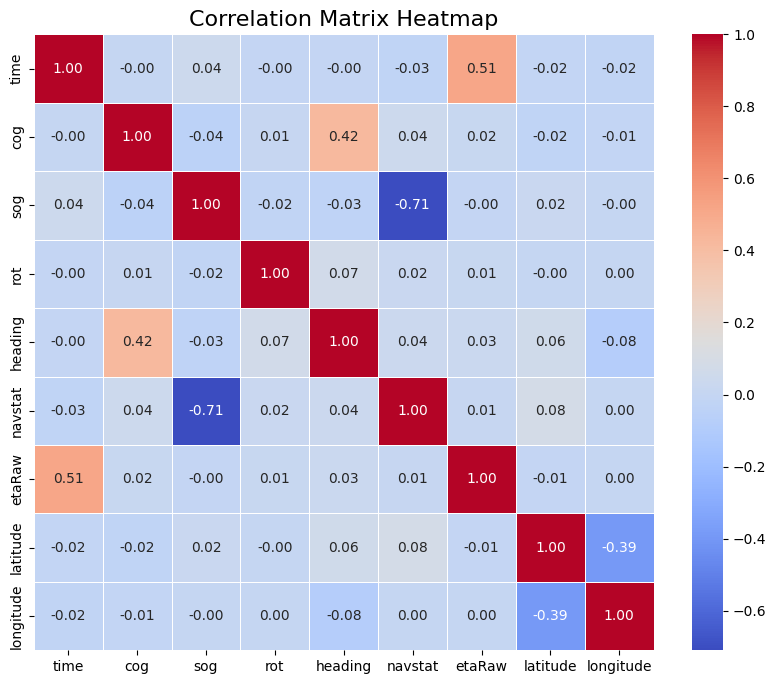

In [10]:
train_df_copy = pd.DataFrame(train_df)


reference_time = pd.to_datetime("2024-01-01 00:00:00")

train_df_copy['time_converted'] = pd.to_datetime(train_df_copy['time'], errors='coerce')
train_df_copy['time'] = (train_df_copy['time_converted'] - reference_time).dt.total_seconds()
train_df_copy.drop(['time_converted'], axis=1, inplace=True)

train_df_copy['eta_converted'] = pd.to_datetime('2024' + '-' + train_df_copy['etaRaw'], format='%Y-%m-%d %H:%M', errors='coerce')
train_df_copy['etaRaw'] = (train_df_copy['eta_converted'] - reference_time).dt.total_seconds()
train_df_copy.drop(['eta_converted'], axis=1, inplace=True)

correlation_matrix = train_df_copy[['time', 'cog', 'sog', 'rot', 'heading', 'navstat', 'etaRaw', 'latitude', 'longitude']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title and labels
plt.title('Correlation Matrix Heatmap', size=16)
plt.show()